In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

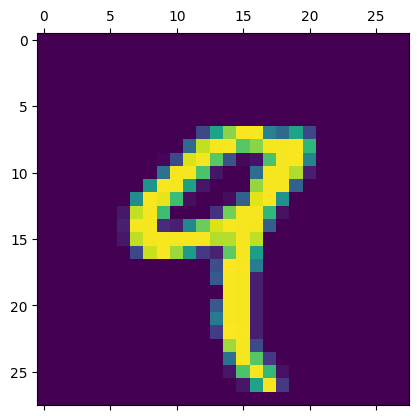

In [7]:
plt.matshow(X_train[4])

In [8]:
y_train[4]

np.uint8(9)

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Scalling

In [10]:
X_train = X_train / 255
X_test = X_test / 255

## Converting data from 2 dimension to 1 dimension array

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Neural Network

In [17]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - accuracy: 0.8222 - loss: 0.7057
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9134 - loss: 0.3112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9197 - loss: 0.2893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9249 - loss: 0.2702
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9269 - loss: 0.2654


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9145 - loss: 0.3019


[0.26631802320480347, 0.9257000088691711]

## Testing

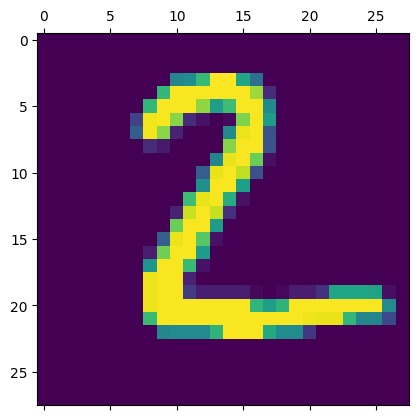

In [20]:
plt.matshow(X_test[1])

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


array([3.7205894e-04, 9.9461144e-01, 6.6071308e-01, 3.3950081e-01,
       2.8759629e-02, 1.0600788e-01, 1.7839333e-01, 1.4117663e-01,
       3.6976960e-01, 3.9571140e-02], dtype=float32)

In [22]:
np.argmax(y_predicted[1])

np.int64(2)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,    9,  927,   16,    8,    4,   13,   11,   35,    2],
       [   4,    0,   16,  919,    0,   29,    2,   13,   20,    7],
       [   2,    2,    4,    1,  922,    0,   10,    4,   10,   27],
       [  12,    3,    4,   27,   10,  780,   16,    6,   27,    7],
       [  12,    3,    5,    1,    7,   10,  917,    2,    1,    0],
       [   1,    6,   23,    8,    9,    0,    0,  956,    1,   24],
       [   8,   11,    6,   26,    9,   29,   10,   14,  855,    6],
       [  11,    7,    1,   11,   34,    7,    0,   32,    5,  901]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

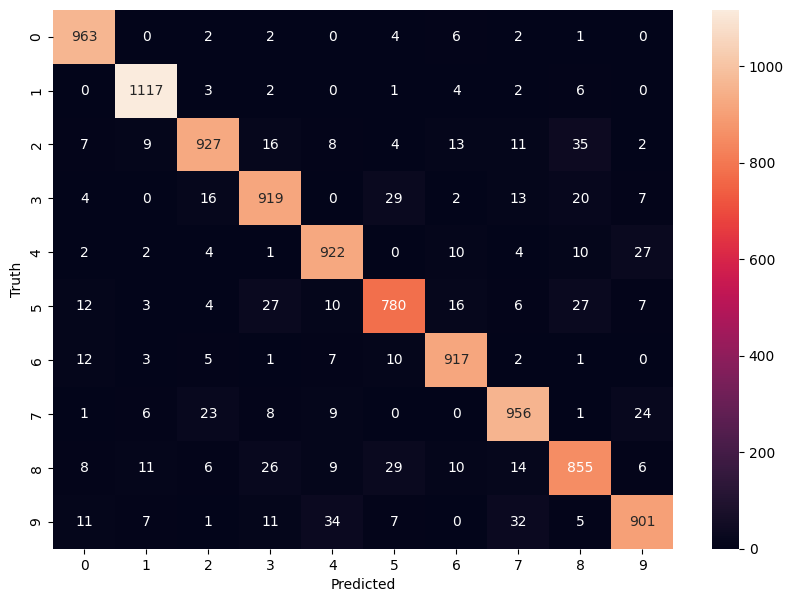

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Neural Network using Hidden Layer

In [27]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - loss: 0.4394  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9628 - loss: 0.1274  
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.9729 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9799 - loss: 0.0650
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.9851 - loss: 0.0487


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9721 - loss: 0.0898


[0.07825874537229538, 0.9761999845504761]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step


Text(95.72222222222221, 0.5, 'Truth')

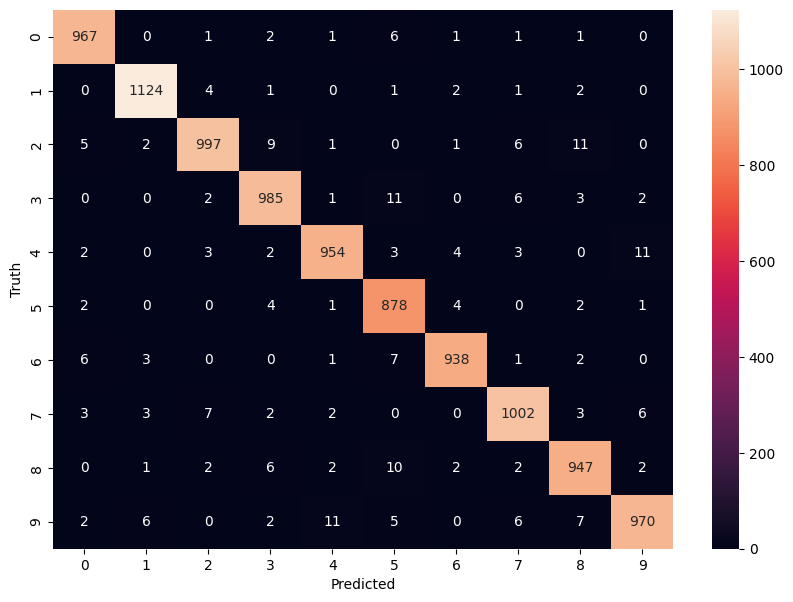

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [32]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8702 - loss: 0.4424
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9649 - loss: 0.1165
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0766
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0565
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0427
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0330
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0271
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0239


In [33]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9710 - loss: 0.1121


[0.09887035191059113, 0.9736999869346619]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step


Text(95.72222222222221, 0.5, 'Truth')

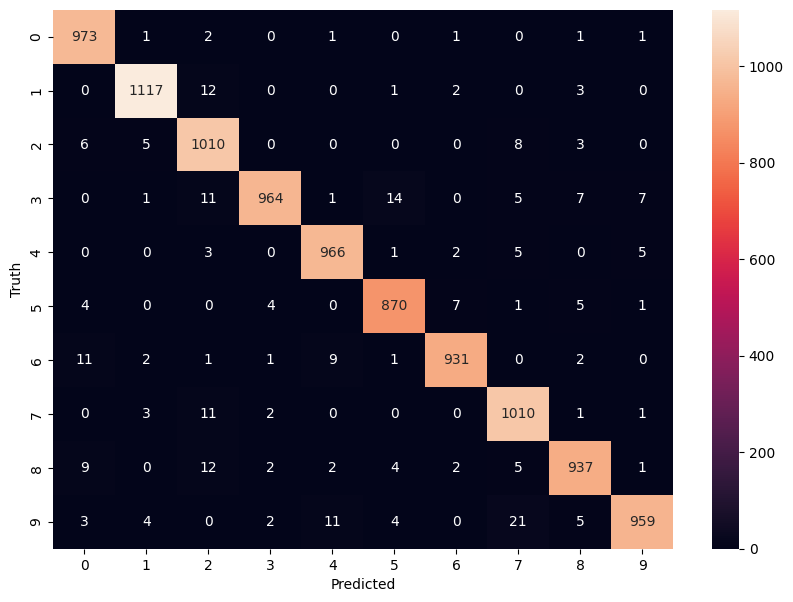

In [34]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# <span style="color:red">TensorBoard</span>

In [37]:
model2 = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

log_dir = "logs/adam"

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=8, callbacks=[tb_callback])

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8741 - loss: 0.4401
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9639 - loss: 0.1173
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9758 - loss: 0.0787
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9830 - loss: 0.0583
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0438
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0376
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0283
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0242


In [33]:
%load_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 17056), started 1 day, 4:28:48 ago. (Use '!kill 17056' to kill it.)

In [33]:
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,062 (328.37 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)